# Inversion and Optimisation <a class="tocSkip">

## Lecture 1: Introduction to Inversion and Optimisation</a><a class="tocSkip"></a>

### General note about the notebooks: <a class="tocSkip"></a>
The notebooks cover a fair amount of material each day. If you want to check whether you have picked up the most important points of the lecture, there's a summary and overview of key concepts at the start of each notebook. There is also a <a href="#definitions"></a>list of all definitions at the end of each notebook. Make sure you are familiar with all terminology introduced in each notebook. For a better highlighting of the defintions, execute the following cell:

In [1]:
%%html
<style>
a.definition {
    color: blue;
    font-style: italic;
    font-weight: bold;
}
</style>

## Summary <a class="tocSkip"></a>
In today's lecture we will first briefly discuss the role of Inversion and Optimisation in science and engineering. We will start with the inversion of linear systems. For this we first need to revise some of the key concepts of Linear Algebra that you've already encountered in _Computational Mathematics_. We will extend these to linear systems with fewer, or more equations than unknowns, i.e. based on non-square matrices. We will spend some time on the technique of Gaussian Elimination, and the LU decomposition which are central to direct methods of solving linear systems. For over-determined systems (more equations than unknowns) we look at the Least Squares method, and for under-determined (fewer equations than unknowns) we look at the minimum norm solution. We will finish our treatment of non-square systems in tomorrow's lecture with the Singular Value Decomposition and the generalized inverse.
    
### Important concepts: <a class="tocSkip"></a>
* the role of inversion and optimisation in science and engineering, data science, and machine learning and the relation between inversion and optimisation
* the various ways to look at the rank of a matrix and its relation to the dimension of its null space, its range, and the space of solutions
* conditions for the existence and uniqueness of solutions
* the classification in equi-determined, under-determined, over-determined and mixed-determined
* Gaussian Elimination, back substitution, pivotting and LU decomposition and its role in solving linear systems, but also determining the rank or the nullspace of a matrix
* obtaining a least-squares solution to over-determined systems (using the normal equation)
* obtaining a minimum-norm solution to under-determined systems

In [2]:
%matplotlib inline
%precision 6
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl

# Introductory comments - Inversion & Optimisation

Many numerical problems in science, engineering, economics and other quantitative subjects can be posed as ***inversion*** or ***optimisation*** problems.    

We will start our discussion by illustrating these problems in a single real variable, where the concepts will already be somewhat familiar, before moving on in this lecture to methods that take an analytical, linear algebra solution approach to multi-variable problems. In later lectures we will cover numerical based solution approaches and expand to nonlinear problems.

## Inversion

Inversion can be thought of as seeking to use a given relationship such as the following 

$$y = f(x)$$

to find $x$ given (1) a value for $y$ and (2) the form of the relationship embodied here in the function $f$ or a means to evaluate $f$.  

- The <a class="definition" href="#definitions" id="forwardproblem">forward problem</a> can be thought of as: given $x$ what is $y$?

- The <a class="definition" href="#definitions" id="inverseproblem">inverse problem</a> is the opposite: given $y$ what is $x$?

The first is usually relatively well-defined: given some inputs $x$ we have a model that generates some predictions $y$. The process of going from inputs $x$ to outcomes $y$ is described as a function $f$ which consists of a series of mathematical operations, or combination of algorithms, that we can perform step by step. The entire model can however become very complex and expensive to evaluate.

This inversion problem may have no general solution, and its solution may be trivial, easy, difficult or impossible depending upon the form of $f$ and the value of $y$.  

### Trival examples <a class="tocSkip"></a>

Suppose $f(x) = \alpha x$ with nonzero $\alpha$, then the inverse of the function $f$ is $f^{-1}(y)=\alpha^{-1} y$, and the solution to the inversion problem:

> given $y$, for what value of $x$ do we have $f(x)=y$ ?
    
is simply $x=f^{-1}(y) = \alpha^{-1} y$.

Now suppose $f(x) = \cos(x)$. Here we already have to be a little more careful: the output values $y=\cos(x)$ only takes values in the range $-1\leq y\leq 1$. If $y\gt 1$ or $y\lt 1$ there is no solution to the inverse problem $\cos(x)=y$.

The function $\arccos(y)$ maps y-values between -1 and 1 to $x$-values between 0 and $\pi$ such that $\cos(x)=y$, and thus forms an inverse of $\cos(x)$. However for any solution $x$ of $\cos(x)=y$, we also get the solutions $x'=x+2k\pi$ or $x'=-x+2k\pi$ where $k$ is an arbitrary (positive or negative) integer in $\mathbb{Z}$.

This is the topic of *existence* and *uniqueness* of solutions.

More generally many functions do not have an explicit formula for their inverse. Even the forward function might not be explicitly given as a simple analytical expression. For example, the function $f$ could be the solution of a time-dependent ODE or PDE, where $x$ is some initial condition value, and $y=f(x)$ is some value that depends on the final state. The solution to this ODE or PDE might only be obtained through a numerical approximation. This means that to evaluate $f(x)$ for a single value of $x$, we need to do an entire run of a numerical model which can potentially be very expensive. As you can imagine, in this case it is no longer feasible to simply compute $f(x)$ for all possible values of $x$ (or even some "representative" subset) and see what values give $f(x)=y$.

### Linear and nonlinear problems in multiple dimensions

In this module, we will look at methods that can be used to solve the multi-dimensional analogue of our original problem, that is find a solution for the vector $\boldsymbol{x}$ given the equation  

$$\boldsymbol{y} = F(\boldsymbol{x})$$

and we will also consider scenarios where  $\boldsymbol{x}$ and $\boldsymbol{y}$ may be of different lengths.

To indicate that $F$ is a function (we can also think of it as an operator) that maps vectors $\boldsymbol{x}$ of length $n$ to vectors of $\boldsymbol{y}$ of length $m$, we use the following notation:

$$F: \mathbb{R}^n \to \mathbb{R}^m.$$

If $F$ is linear, we can write $F$ as the the action of a matrix $\underline{\mathbf A}$ on $\boldsymbol{x}$:

$$F(\boldsymbol{x}) = \underline{\mathbf A}\boldsymbol{x}$$

and the linear inversion problem is formulated as:

$$\text{find $\boldsymbol{x}$ such that }\underline{\mathbf A}\boldsymbol{x}=\boldsymbol{y}$$

Again considering the general case where $\boldsymbol{x}$ has length $n$ that may be different from the length $m$ of $\boldsymbol{y}$, the matrix has shape $m\times n$ ($m$ rows by $n$ columns) and we can think of this problem as solving a linear system of $m$ equations with $n$ unknowns.

#### Residual form <a class="tocSkip"></a>
Given the general nonlinear inversion problem

$$\text{find $\boldsymbol{x}$ such that }
F(\boldsymbol{x}) = \boldsymbol{y},$$

which we can think of as $m$ nonlinear equations each with right-hand side $y_i, i=1\ldots m$
stored in a vector $\boldsymbol{y}$, that we solve for a vector $\boldsymbol{x}$ with entries $x_j, j=1\ldots n$,
we will often use the equivalent <a class="definition" href="#definitions" id="residualform">residual form</a> of the equations

$$\text{find $\boldsymbol{x}$ such that }
R(\boldsymbol{x}) \equiv \boldsymbol{y} - F(\boldsymbol{x}) = \boldsymbol{0}$$

where $R(\boldsymbol{x})$ is reffered to as the residual of the equations. Note that the choice for the sign of $R$ is arbitrary, we could also have the definition $R(\boldsymbol{x}) \equiv F(\boldsymbol{x}) - \boldsymbol{y}$.

#### Root finding <a class="tocSkip"></a>
In this module we will look at various iterative methods, in which we start with a best guess for $\boldsymbol{x}$ which we hope to iteratively improve. As we iterate towards the solution we should see that $R(\boldsymbol{x})\to \boldsymbol{0}$. Thus the residual vector, and in particular its length $\|R(\boldsymbol{x})\|$, can be used as a measure to indicate how well we are already satisfying the equations for the current approximation $\boldsymbol{x}$.

In this context we will often use the notation $\boldsymbol{x}^\ast$ to denote an exact solution, so $R(\boldsymbol{x}^\ast)=0$ exactly. For general $R$, the problem

$$\text{find $\boldsymbol{x}^\ast$ such that }
R(\boldsymbol{x^\ast}) = \boldsymbol{0}$$

is referred to as a <a class="definition" href="#definitions" id="rootfindingproblem">root-finding problem</a>, with the solutions $\boldsymbol{x}^\ast$ refered to as roots.

### Inversion applications

Based on the very general definiton we have used so far, inversion problems are everywhere in applied computational science engineering, data science and machine learning. Some broad cases:

#### Numerical Solution of PDEs <a class="tocSkip"></a>
When discretising PDEs the continuous equations are discretized into a finite number $m$ of equations that need to be solved for the discrete solution represented by a vector of $n$ unknowns (so called Degrees Of Freedom, or DOFs) that approximate the solution. If the underlying PDE is nonlinear, the discretized equations can also become nonlinear. If the PDE is time-dependent, often an inversion problem of $m$ equations and $n$ unknowns needs to be solved every time step. In the typical case the number of equations and unknowns is the same, $m=n$, and is associated with entities in the computional mesh (vertices, cells or edges). In high-resolution models this number can be very large.

<table><tr><td><img src="figures/weather.png" width="500" /></td>
    <td><img src="figures/ARC-1991-AC91-0397-1R~medium.jpg" width="500" /></td></tr></table>



#### Data Inversion <a class="tocSkip"></a>
In measurement the physical property we're actually interested in can often only be observed indirectly. For instance, remote sensing uses the reflective properties of the Earth's surface and atmosphere to infer various properties, such as vegetation on land, but also various oceanographic properties such as sea surface height, bathymetry, temperature and salinity, and currents. This relies on some understanding of how the unknown physical properties $\boldsymbol{x}$ (e.g. vegetation) will affect the actual measured data (e.g. the reflected radiation observed by satelites), in other words we need a mathematical forward model $F(\boldsymbol{x})$ that predicts for every possible value of $\boldsymbol{x}$ what the actual measured values $\boldsymbol{y}$ would be, so that for a given measurement $\boldsymbol{y}$ we can invert for the actual $\boldsymbol{x}$ by solving the inversion problem $F(\boldsymbol{x})=\boldsymbol{y}$. This predictive model can be anything from a simple empirical formula, to very sophisticated numerical models including the solution of PDEs.

<table><tr>
<td><img src="figures/survey-ship-diagram.png" /></td>
<td><img src="figures/brainscan.png" /></td>
<td><img src="figures/satellite.jpg" /></td>
</tr></table>



Our prediction of the observation is of course never perfect. The model $F(\boldsymbol{x})$ may rely on various other data (other than the $\boldsymbol x$ we are inverting for) and there may be a high degree of uncertainty in these. Moreover, any mathematical model is a simplification of the actual physical process that couples the property of interest $\boldsymbol x$ with the observed measurement $\boldsymbol y$, and finally the measurement $\boldsymbol y$ may introduce some level of error/uncertainty. Thus we should never expect the model prediction $F(\boldsymbol{x})$ to be matched exactly - rather we are simply trying to find a vector $\boldsymbol x$ for which the prediction $F(\boldsymbol{x})$ _best matches_ the observed data $\boldsymbol y$. If we have some idea about the statistical distribution of the measurement and model errors, we can also translate this into a prediction about the uncertainty in the inverted property $\boldsymbol x$.

#### Parameter estimation, Curve Fitting and Regression <a class="tocSkip"></a>
Note that in the forward model $F$ that predicts some observed data $\boldsymbol{Y}$, we are not typically inverting for all inputs to the function. We could divide the inputs to the model into two sets (vectors): 

$$\boldsymbol{Y} = F(\boldsymbol{X} ;  \boldsymbol{m}) $$

where the $\boldsymbol{m}$ are the quantities we want to invert for, and assume that $\boldsymbol{X}$ are fixed inputs that we already know to some degree. In which case we can consider the inversion problem

$$
\text{find }\boldsymbol m\text{ such that }
\tilde F(\boldsymbol m) = F(\boldsymbol{X} ;  \boldsymbol{m}) = \boldsymbol{Y}
$$

in which $\tilde F$ is the same model (function) $F$ but with fixed input $\boldsymbol{X}$.

In other applications however, the known inputs $\boldsymbol{X}$ might be variable, and we might have a series of observations $i=1,\dots N$ with for each known value $\boldsymbol{X}_i$ for the input $\boldsymbol{X}$, we have an observed output $\boldsymbol{Y}_i$. Now the inversion takes the form

$$
\text{find }\boldsymbol m\text{ such that }
F(\boldsymbol{X}_i ;  \boldsymbol{m}) \approx \boldsymbol{Y}_i \text{ for all } i=1, \dots N
$$

Here $F$ could be a sophisticated model based on complex physical laws, that once the values for $\boldsymbol{m}$ have been found, can be thought of as a way of predicting $\boldsymbol Y$ for each input $\boldsymbol X$, not only for the given set of inputs $\boldsymbol X_i$ with known observations $\boldsymbol{Y}_i$, but for any value of $\boldsymbol X$. The (initially) unknown values $\boldsymbol{m}$ can then be thought of as parameters or coefficients in the model, and the inversion for $\boldsymbol{m}$ as a process to improve the model by finding optimal parameter values - a process refered to as parameter estimation.

At the other extreme, $F$ could also be a very simple function. For instance in *linear regression* $F$ is simply a linear combination of some basis functions $\phi_j(\boldsymbol{X})$ with coefficients given by the $m_j$ from the unknown vector $\boldsymbol{m}$:

$$F(\boldsymbol{X} ; \boldsymbol{m}) = \sum_j m_j \phi_j(\boldsymbol{X})$$

In its simplest form this is just curve fitting, where we find the optimal coefficients $m_j$ that produces a curve that best fits the data: $\boldsymbol{Y}_j \approx F(\boldsymbol{m} ; \boldsymbol{X}_j)$. Again in many applications it is important to take into account the uncertainty in the known inputs $\boldsymbol{X}_i$ and outputs $\boldsymbol{Y}_i$ so that for instance we give less weight to the observations that we are less certain about, or expect to vary less. Note that in linear regression the basis functions $\phi_j(\boldsymbol{X})$ may well be nonlinear. More sophisticated models can be constructed in *nonlinear regression* by allowing $F$ to be nonlinear in $\boldsymbol m$ as well.

<table><tr>
<td><img src="figures/xkcd-curve-fitting.jpg" /></td></tr>
<tr><td>A not so serious take on curve fitting from <a href="https://xkcd.com/2048">https://xkcd.com/2048</a></td></tr>
</table>

#### Machine Learning <a class="tocSkip"></a>
Regression is a central technique in many machine learning approaches. Here the inputs $\boldsymbol X_i$ and (desired) outcomes $\boldsymbol Y_i$ form a so called *training set*, and the inversion process is referred to as *learning* in which the model $F$ *learns* by improving its parameters $\boldsymbol m$ such that $F$ better performs on the training set. A good example are neural networks in deep learning, in which the input vector $\boldsymbol X_i$ is mapped to a series of inbetween vectors (the "hidden layers") before being mapped to the output vector $\boldsymbol y_i$ with the maps between these layers being determined by the parameters $\boldsymbol m$. In deep learning there can be many such layers and therefore many parameters $\boldsymbol m$. To achieve good performance and avoid overfitting, a large training set is required. To enable learning with a large number of parameters, and large training sets, efficient inversion algorithms are essential.

<table><tr><td>
<img src="figures/Deep-Neural-Network-architecture.png" width="800/" /></td></tr>
<tr><td>Figure from <a href="https://ieeexplore.ieee.org/document/8598488">M. Bahi and M. Batouche, PAIS 2018</a></td></tr>
</table>

### A simple inversion/parameter estimation example: polynomial interpolation/least squares curve-fitting

A standard parameter estimation problem is fitting a function, defined by a vector of parameters, to a given dataset. We saw this example in the *Computational Mathematics* module.


Suppose that our "model" is given by the polynomial (of degree $N$) function

$$f(X; \boldsymbol{a} ) = a_0 + a_1 X + a_2 X^2 + a_3 X^3 + \ldots a_N X^N$$

The vector of $N+1$ parameters $\boldsymbol{a}$ fully describes our model, and in this case our model is linear in these parameters, and hence the process of finding the parameters is sometimes termed linear regression.

Given some data, we will see that we end up with a ***linear*** problem to solve, even though our model is nonlinear in the inputs $X$.

You can think of $X$ as locations we evaluate our model at in order to compare against or match to data, while $\boldsymbol{a}$ are unknown input parameters to our model that describe in some sense the governing "physics".


For the inversion problem we are assuming we know the $X$'s (e.g. maybe these are the locations our data is collected at) and the $y$'s (the observations of the output of our problem/model at these locations), and we want to find $\boldsymbol{a}$ (i.e. the parameters that govern our model).

#### Problems leading to a square linear/matrix system - fitting a quadratic to three data points  <a class="tocSkip"></a>

In *Computational Mathematics* we considered cases where we  are given $N+1$ data points $(X_i, y_i)$ (with distinct $X_i$'s) and thus we can solve it for $\boldsymbol{a}$ and fix/fully define our "model". We called this ***polynomial interpolation***.

<br/>

For example, consider a case where we have three data points $\{(X_0,y_0),(X_1,y_1),(X_2,y_2)\}$. 

First we note that the quadratic function has three free parameters and can fit this data exactly.

Substituting the data into our quadratic model

$$ y = f(X; \boldsymbol{a} ) \equiv a_0 + a_1\,X + a_2\,X^2$$

leads to a system of three simultaneous equations for our three unknowns, or a $3\times 3$ **linear** system to solve:

$$
\begin{pmatrix}
1 & X_0 & X_0^2 \\
1 & X_1 & X_1^2 \\
1 & X_2 & X_2^2
\end{pmatrix}
\begin{pmatrix}
a_0\\
a_1\\
a_2
\end{pmatrix}
=
\begin{pmatrix}
y_0\\
y_1\\
y_2
\end{pmatrix} \;\;\;\;\;\;\;\text{or equivalently in matrix notation} \;\;\;\;\;\; \underline{\mathbf V}\boldsymbol{a} =\boldsymbol{y}.
$$

If we solve this system by inverting the matrix ($\underline{\mathbf V}$) we have our quadratic polynomial coefficients:  $\boldsymbol{a} = \underline{\mathbf V}^{-1}\boldsymbol{y}$.

Let's form and solve the matrix system using appropriate NumPy functions.

The matrix $\underline{\mathbf V}$ is called the Vandermonde matrix and there is a Numpy function for it.

V = 
[[1.   0.3  0.09]
 [1.   0.5  0.25]
 [1.   0.8  0.64]]

 Our coefficients a = 
[-1.8       8.866667 -7.333333]

The output from np.polyfit(x, y, 2) = 
 [-7.333333  8.866667 -1.8     ]

Which agrees with us as long as we reverse the order of our coefficients:
np.flip(a, 0) = 
[-7.333333  8.866667 -1.8     ]


(0.000000, 1.000000)

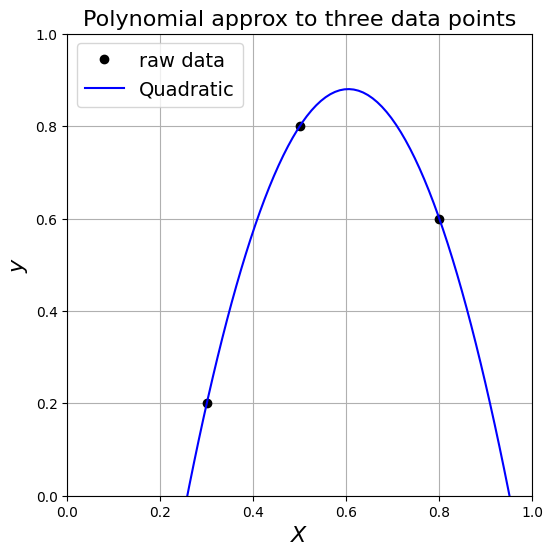

In [3]:
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$X$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)

# three data point example
Xi = [0.3, 0.5, 0.8]
yi = [0.2, 0.8, 0.6]

# use a function to construct the matrix above
# note than numpy already has a function to do this
V = np.vander(Xi, increasing=True)

print('V = \n{}'.format(V))

# use a numpy linear algebra solver to solve the system
# uses an LU algorithm - we'll come back to how this is done
a = np.linalg.solve(V, yi)

# output the coefficients for our quadratic we have computed
print('\n Our coefficients a = \n{}\n'.format(a))

# show that they are the same as is obtained from 
# numpy's polyfit function (for a quadratic)
# (which of course they should be, given we argued that this polynomial is unique)
print('The output from np.polyfit(x, y, 2) = \n {}'.format(np.polyfit(Xi, yi, 2)))

# Note that the order is reversed because numpy.poly* assumes decreasing
# rather than the increasing powers of x which we have used above

# set up figure
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111)

# plot the raw data
plot_raw_data(Xi, yi, ax1)

# x locations at which to evaluate and plot the quadratic polynomial
X = np.linspace(0., 1., 100)

# Set up a polynomial from the coefficients using numpy rather than writing out.
# Use numpy.flip to reverse the coefficients as poly1d assume decreasing rather than
# increasing powers - look at documentation
p2 = np.poly1d(np.flip(a, 0))
print('\nWhich agrees with us as long as we reverse the order of our coefficients:')
print('np.flip(a, 0) = \n{}'.format(np.flip(a, 0)))

# the p2 here is a function so evaluate it at our x locations
y = p2(X)

# and plot
ax1.plot(X, y, 'b', label='Quadratic')

# add a figure title
ax1.set_title('Polynomial approx to three data points', fontsize=16)
# Add a legend
ax1.legend(loc='best', fontsize=14)
# set bounds
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

#### Problem leading to a non-square linear/matrix system - an example over-determined problem  <a class="tocSkip"></a>

In this module it is important that we understand and are able to deal with situations that result in non-square problems.

As an example, let's suppose we have a case where our model is again quadratic, i.e. it has three model parameters:

$$ y = f(X; \boldsymbol{a} ) \equiv x_0 + x_1\,X + x_2\,X^2,$$

but let's further suppose we have been given *six* distinct pieces of data, i.e. we now have a mismatch - more data than unknowns.

We can write our problem mathematically as

$$
\begin{pmatrix}
1 & X_0 & X_0^2 \\
1 & X_1 & X_1^2 \\
\vdots & \vdots & \vdots \\
1 & X_5 & X_5^2
\end{pmatrix}
\begin{pmatrix}
a_0\\
a_1\\
a_2
\end{pmatrix}
=
\begin{pmatrix}
y_0\\
y_1\\
y_2\\
y_3\\
y_4\\
y_5
\end{pmatrix},
$$

or equivalently $\underline{\mathbf V}\boldsymbol{a} =\boldsymbol{y}$ where now we have a ***non-square** version of the Vandermonde matrix (read the `numpy.vander` docs).

In both the initial problem description, as well as this linear/matrix system, what does it mean to be a solution to this problem?

Consider the simpler case of a *linear* (in $X$) model asked to pass through *three* data points. If the three points happened to lie along a line then we can solve the problem, i.e. we can invert for the model parameters. But if not there is no solution (at least no *exact* solution) that fits all the data.

### The least squares solution

In the language of *Computational Mathematics* we are in the world of curve-fitting rather than interpolation - we can't find a model (curve) that fits all the data exactly, but can still obtain a potentially useful model if we appropriately define "useful".

Previously we used the command `numpy.polyfit` to fit a polynomial to data where the polynomial wasn't of a high enough degree to go through all the data points (or some of the data points weren't at distinct $X$ values - i.e. two $y$ values for the same $X$, think a cloud of points).

Instead of requiring the curve to go through all data points exactly (as for the cases above), we used ***least squares*** fitting to construct a function $f(X;\boldsymbol{a})$, e.g. a polynomial in $X$ of degree $N$, (equivalently finding the parameters $\boldsymbol{a}$  which minimises the sum of the squares of the differences between $M+1$ data points provided and the polynomial approximation, i.e. it minimises the quantity:

$$E := \sum_{i=0}^{M} (f(X_i;\boldsymbol{a}) - y_i)^2,$$

where $f(X_i;\boldsymbol{a})$ is the output of our model evaluated at point $X_i$, and the $y_i$ are the corresponding data values.  Note that for the "cloud of points" example we will be in the case where $M+1 \gt N$.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Linear_least_squares_example2.svg" style="width: 300px"/>

*Figure from https://en.wikipedia.org/wiki/Linear_least_squares) We're computing the sum of the squares of the distances indicated in green.*

Note that this $E$ can be defined equivalently as

$$E=\| \boldsymbol{f}(\boldsymbol{X}; \boldsymbol{a} ) - \boldsymbol{y}\|_2^2
= || V\boldsymbol{a} - \boldsymbol{y}||_2^2,$$

where $\| \cdot \|_2$ is the 2 norm  or the Euclidean norm.

[*Note that $\| \cdot \|_2$ takes the square root of the sum of squares, so that $E$ is the square of the 2-norm of the error. Since $E$ is always positive however, minimisation of $E$ is exactly equivalent to minimisation of the 2-norm*].

We will show later that the coefficients ($\boldsymbol{a}$) of the polynomial that minimises $E$ are given by the solution to the linear system

$$V^TV\boldsymbol{a} = V^T\boldsymbol{y},$$

where $V$ is again the Vandermonde matrix. 

<br/>

[As we have seen, $V$ is no longer square in the case where $M+1 > N$. 
What is the shape of $V$, and indeed all the vectors and matrices appearing in this equation - is it "dimensionally" consistent?]

<br/>

Let's check that this is true by forming and solving the matrix system $V^TV\boldsymbol{a} = V^T\boldsymbol{y}$ for $\boldsymbol{a}$ and comparing with the result we get using `numpy.polyfit`.

a = 
 [ 0.759098 -0.431931  0.098893 -0.005521]

poly_coeffs = 
 [-0.005521  0.098893 -0.431931  0.759098]

Our a vector = output from np.polyfit (as long as we flip the order)?  True


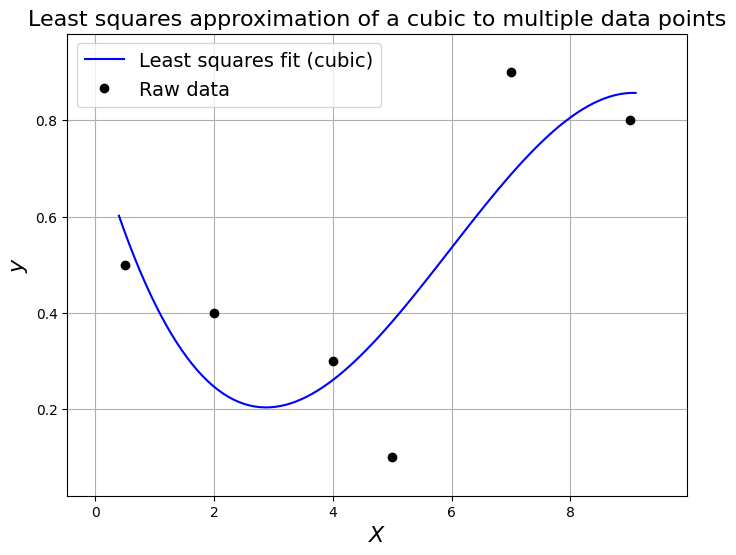

In [4]:
# Some random data
X = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
y = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Consider a polynomial of degree 3 - so not high enough to go through all the data
# (unless we're in the unlikely case where all the data happens to lie on a cubic!)
N = 3

# Use a numpy function to construct the Vandermonde matrix
V = np.vander(X, N+1, increasing=True)

# Form the matrix A by transposing V and multiplying by V:
A = V.T @ V  # same as A = np.transpose(V) @ V

# Use a function from SciPy's linalg sub-package to find the inverse:
invA = sl.inv(A)

# Form the RHS vector:
rhs = V.T @ y

# Multipy through by the inverse matrix to find a:
a = invA @ rhs
print('a = \n', a)

# Compare against the coefficient that numpy's polyfit gives us
poly_coeffs = np.polyfit(X, y, N)
print('\npoly_coeffs = \n', poly_coeffs)
# they're the same, we just set up our algorithm to return the coefficient in the 
# opposite order to polyfit - we need to remember this when we evaluate the polynomial

print('\nOur a vector = output from np.polyfit (as long as we flip the order)? ', 
      np.allclose(np.flip(a), poly_coeffs))
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

XX = np.linspace(0.4, 9.1, 100)
yy = a[0] + a[1] * XX + a[2] * XX**2 + a[3] * XX**3

ax1.plot(XX, yy, 'b', label='Least squares fit (cubic)')

# Overlay raw data
ax1.plot(X, y, 'ko', label='Raw data')
ax1.set_xlabel('$X$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Least squares approximation of a cubic to multiple data points', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14);

### A more complex Inversion example

In this example from some current research we have a model for tides in the Bristol Channel and Severn Estuary, there are multiple numerical and physical "parameters" that go into the model, including incoming tidal boundary conditions, bathymetry etc, some of which are known to varying levels of uncertainty. 

In this example we consider bed roughness (or bottom friction) as the parameters we wish to invert for, given the data of time series of tidal heights at tide gauges indicated by the red dots in the following image which also shows the discretised domain and the computational mesh

<img src="./figures/mesh.png" width="500x"/>

Using *a priori* information on the approximate distribution of sediment grain sizes on the seabed, we partition the domain into three zones: rock, gravel and sand, and assign one parameter value to each. In this case we therefore have more data than parameters.

In this case an iterative approach is taken and the following figure shows how the inversion progresses

<img src="./figures/thetis_inversion_convergence.png" width="400x" />

$J$ is a misfit function between modelled tides and observations from real work tide gauges, and we solve the inversion problem by seeking to minimse $J$ - we see it drop as the model fit to data improves with iteration. How the three parameter values vary with iteration is also shown.

The quality of the prediction can then be compared at the green squares where data was not used in the inversion. We find that the error in  prediction at these independent locations is indeed reduced within the same numerical model. We have also found that the prediction is improved when these physical values are used in a completely independent tidal model. This latter fact gives us some indication that our inversion is telling us something useful physically and not simply correcting for biases in the first model.

For more details see <a href="https://link.springer.com/article/10.1007/s10236-022-01507-x">Simon Warder et al., Ocean Dynamics volume 72, pages 361–382 (2022)</a>

## Optimisation

Now let's quickly review what ***optimisation*** is an how it relates to inversion.

<br/><br/>

Optimisation, in a single real variable, seeks to find a value for $x$ such that a scalar function 

$$f(x)$$

has a minimum value (or equivalently that $-f(x)$ has a maximum value).    

For example, $f(x)$   might  be  the  energy  of  a  particle  at  position  $x$. The  value  of  $x$  for  which  this  is  a  minimum will provide a rest position for the particle. 

Or we could have a problem where we are seeking a design of something that minimises cost or maximises profit.

There  are  many  ways  to  solve  such  problems,  and  again  there  is  no  general  solution.  In practical real problems, there may be no solution, a single unique solution, several solutions  or infinitely many solutions.  

### Optimisation as an inversion problem

One way to address the optimisation problem is to try to solve 

$$f'(x)=0$$

With this approach note that  **we have converted an optimisation problem into an inversion problem**, a **root-finding problem** to be precise. We are looking for the $x$ values that satisfy this equation. This will give us the [stationary points](https://en.wikipedia.org/wiki/Stationary_point) of the problem. More on this in tomorrow's lecture.

### Inversion as an optimisation problem

In practice, it is often the case that in order **to solve an inversion  problem, it is instead converted into an optimisation problem**. 

For example, we can ***define a scalar misfit function*** measuring in some sense the difference between model predictions and observations and seek to iteratively minimise this misfit. The least squares error is an example of this. We showed above that we could write down the general solution to this problem. But it's only feasible to use that approach for small cases. For larger problems we will need iterative solution methods such as in the tidal example above.    

### Optimisation - simple example

Consider the problem: find $\boldsymbol{x}\equiv (x,y)$ which minimises the function

$$ f(\boldsymbol{x}) = 1+2x + 4y + x^2+2xy+3y^2$$


The following image shows a contour plot of the function, and the red star indicates the $(x,y)$ location of the minimum

<img src="./figures/simple_optimisation.png" width="500x" />

A homework exercise asks you to compute the minimum and to generate this image.

We'll cover quadratic minimisation problems in more detail in tomorrow's lecture, and will generalize to more general non-linear functions at the end of this week.

### More complex example: PDE-Constrained Optimisation <a class="tocSkip"></a>

The following movie shows iterations from an optimisation problem where our task is to maximise the power generated by an array of 256 individual tidal turbines. At every iteration a shallow water solver computes the flow field and the power of the array. The design parameters are then the $(x,y)$ location of each of the turbines.

For more information see: [SW Funke et al., Tidal turbine array optimisation using the adjoint approach, Renewable Energy 63, 658-673](https://www.sciencedirect.com/science/article/pii/S0960148113004989).

<video controls="" loop="" src="animations/array.mp4" width="600"></video>
<br/>

You'll return to this example in a later lecture on "PDE-constrained optimisation".

### More Complex Example: Topology and Shape Optimisation <a class="tocSkip"></a>
<table><tr>
<td><img width="300px" src="figures/topology_optimisation1.png" /></td>
<td word-wrap="break-word"><img width="300px" src="figures/topology_optimisation2.png" /><br/>
<div width="300px">
    <font size="1">Images from:<a href="https://doi.org/10.1007/s00158-019-02440-2">Kambampti et al.</a>,
<a href="https://doi.org/10.1109/TVCG.2015.2502588">Wu et al. </a>, and<br/>
<a href="https://doi.org/10.3390/fluids5010029">Alexandersen et al.</a></font></div>
</td>
<td><img width="300px" src="figures/topology_optimisation3.png" /></td>
</tr></table>


Topology and shape optimisation have a wide range of applications in structural engineering (e.g. bridges and buildings), aerodynamics and the automotive industry, consumer electronics, etc. The below shows the classical cantilever optimisation problem: optimise the shape and topology (number of holes) of a cantilever, which is attached on the left and has a force applied on the right, trying to minimize the amount of material needed whilst minimising the amount of deformation (so called "compliance"). In the computation below this is done using adaptive meshing techniques where the mesh is contiuously optimised to most efficiently put resolution where needed:

<video controls="" loop="" src="animations/cantilever.mp4" width="600"></video>



# Existence and Uniqueness of Solutions and the rank of a matrix
In the first three lectures we will concentrate on solving (large!) linear systems of equations efficiently, before we move on to inverting and optimising more complex nonlinear functions. As you will find out in later lectures, many nonlinear solver algorithms rely on the repeated solution of a linearised version of the nonlinear problem, so even there efficient linear solver algorithms are an essential ingredient. Today we will focus in particular on linear systems where the number of equations is not necessarily the same as the number unknowns. We will start with revising the question of how to determine whether a linear system has a solution and, if so, whether it is unique - you have seen this before in the _Computational Mathematics_ module, but today we want to make sure in particular that we have a more generalized picture of how this works even for non-square matrices.

## Linear Independence

$\DeclareMathOperator\span{span}
\DeclareMathOperator\rank{rank}$

Before we move on it is important to remind ourselves of a few definitions. In the following assume
V is a set of $k$ vectors with lenght $n$. in other words:

$$ V = \{ \boldsymbol{v}_1, \boldsymbol{v}_2, \ldots \boldsymbol{v}_k \} \subset \mathbb{R}^n$$

* a set of vectors V <a class="definition" href="#definitions" id="linearlydependent">linearly dependent</a>, if one of the vectors can be written as a linear combination of the others
* a set of vectors V <a class="definition" href="#definitions" id="linearlyindependent">linearly independent</a>, if none of the vectors can be written as a linear combination of the others
* the space of all vectors than can be written as a linear combination of the vectors in V is called the 
span of V, or $\span(V)$ for short. The span of V is a subspace of $\mathbb{R}^n$, which means that it's not just a subset of
some vectors, but $\span(V)$ forms a vector space on its own - which in
particular means you can take any linear combination of vectors in the span of
$V$ and the result is still in the same subspace. If $V$ is formed of $k$ linearly independent vectors (this implies than $k\leq n$)
then the dimension of this subspace is $k$.

Examples:
* if V consists of a single vector ($k=1$) then the span of V is the subspace
  formed by all scalar multiples of that same vector. This subspace forms a
line through the origin of $\mathbb{R}^n$ and indeed has dimension $k=1$.
* if V consists of two linearly independent vectors, the span of V is a plane
  with dimension 2. If these two vectors are of lenght 2, i.e. they are in
$\mathbb{R}^2$, then this plane is in fact just the same as $\mathbb{R}^2$, in
other words any vector in $\mathbb{R}^2$ can be written as a linear combination
of these two vectors. If the two vectors are of length 3, i.e. V is a subset of $\mathbb{R}^3$,
then the span of V is a plane in $\mathbb{R}^3$, i.e. a subspace of dimension 2.
* things becomes harder to visualise in higher dimensions, but the same pattern applies: $k$ linearly independent vectors in $\mathbb{R}^n$ span a k-dimensional subspace of $\mathbb{R}^n$ and $n$ linearly independent vectors in $\mathbb{R}^n$ span all of $\mathbb{R}^n$.

A linearly independent set of vectors that span a vector space (be it a subspace of $\mathbb{R}^n$ or all of $\mathbb{R}^n$) is also
referred to as a basis for that vector space.

If V is a linear-dependent set of vectors, we can reduce it: by definition (at
least) one of the vectors can be written as a linear combination of the others,
and is thus in a sense redundant: it is already in the span of $V$. If we leave
it out, the span of the remaining vectors is still the same. In this way we can
remove linearly dependent vectors from $V$ until $V$ becomes linearly
independent. The dimension of the span of $k$ linearly dependent set of vectors
is therefore smaller than $k$: it is equal to the number of linear independent
vectors within $V$.

#### Independent columns in a matrix <a class="tocSkip"></a>
Now why is this relevant for the solution of linear systems?
Let's take a closer look at what we are actually doing when we calculate a matrix vector product
of a $m\times n$ matrix $\underline{\mathbf A}$ with an $n$-vector $\boldsymbol{x}$:

$$
  \underline{\mathbf A}\boldsymbol{x} = 
\begin{pmatrix}
\boldsymbol{a}_{:1} & \boldsymbol{a}_{:2} & \ldots & \boldsymbol{a}_{:n}
\end{pmatrix}
\begin{pmatrix}
  x_1 \\ x_2 \\ \vdots \\ x_n
\end{pmatrix}
= x_1 \boldsymbol{a}_{:1} + x_2 \boldsymbol{a}_{:2} + \ldots x_n \boldsymbol{a}_{:n}
$$

here the $\boldsymbol{a}_{:j}$ are vectors of length $m$ that represent the $n$ columns of the matrix.
Written out in this way we see that we are simply taking a linear combination of the matrix columns, with coefficients
given by the $x_j$ entries of $\boldsymbol{x}$. Thus the result of this matrix vector product is in the span of the column vectors!

From this picture we can immediately see that 

$$\underline{\mathbf A}\boldsymbol{x} = \boldsymbol{b}$$

only has a solution if the right-hand side vector $\boldsymbol{b}$ is in the span of the column vectors. If it is not, then the system does not have a solution. 

The span of the column vectors thus determines what vectors the matrix vector product can map to, and is therefore also referred to as the range of the matrix. The dimension of this range (a subspace of $\mathbb{R}^m$) is called the rank of the matrix. The linear system is only solvable for arbitrary right-hand side $\boldsymbol{b}$, if the range of the matrix covers all of $\mathbb{R}^m$, in other words if $\rank(\underline{\mathbf A})=m$.

#### Independent rows in a matrix <a class="tocSkip"></a>
We have made a link between linear independence of the columns of a matrix, and the solvability of the linear system. Can we do the same with the rows of the matrix?

$$
  \underline{\mathbf A}\boldsymbol{x} = 
\begin{pmatrix}
a_{11}  & a_{12}  & \ldots & a_{nn} \\
a_{21}  & a_{22}  & \ldots & a_{2n} \\ 
\vdots & \vdots & \ddots & \vdots \\
a_{m1}  & a_{m2}  & \ldots & a_{mn} \\ 
\end{pmatrix}
\begin{pmatrix}
  x_1 \\ x_2 \\ \vdots \\ x_n
\end{pmatrix}
=
\begin{pmatrix}
a_{11} x_1 + a_{12} x_2 + \ldots + a_{nn} x_n \\
a_{21} x_1  + a_{22} x_2  + \ldots + a_{2n} x_n \\ 
\vdots \\
a_{m1} x_1  + a_{m2} x_2  + \ldots + a_{mn} x_n
\end{pmatrix}
=
\begin{pmatrix}
  b_1 \\ b_2 \\ \vdots \\ b_m
\end{pmatrix}
$$

Each row of the matrix represents the coefficients of a linear equation in $\boldsymbol{x}$ with right-hand side given by the entries of a vector $\boldsymbol{b}$. Let's consider what happens if we introduce the rows one by one, adding them to the system. So we start with zero rows, and $\boldsymbol{x}$ can still be any vector in $\mathbb{R}^n$. After we have introduced the first row/equation the solution is restricted to a smaller subspace of $\mathbb{R}^n$, in fact the space of vectors that satisfies the first row equation is a $n-1$-dimensional subspace of $\mathbb{R}^n$. Every time we add another equation (row) to the system of equations, we further constrain the possible solutions to the system.

However if we introduce a new row that is a linear combination of one of the previous rows, we have to be careful. Say for instance the third row we introduce is simply the sum of the first and second row, if $\boldsymbol{x}$ satisfies the first two equations (left-hand side equals right-hand side) then the sum of the left-hand side of the first two equations has to be the same as the sum of the right hand side: $b_1+b_2$. Thus if the left-hand side of the third equation is the sum of the first two, then the right-hand side of the third equation, $b_3$ also has to be: $b_3=b_1+b_2$. Thus we see that this system of equations no longer has a solution if $b_3\neq b_1+b_2$. The same can be said for any linearly dependent row we add to the system. Only if we have $m$ linearly independent rows, does the system have a solution for arbitrary right-hand side vectors $\boldsymbol{b}$.

This sounds very familiar to what we concluded for matrix columns. In fact it can be shown that **the number of linearly independent columns in a matrix is the same as the number of linearly independent rows** in a matrix! Thus we can define the <a class="definition" href="#definitions" id="rankofamatrix">rank of a matrix</a> as either the number of linearly independent columns or the number of linearly independent rows, and a system $\underline{\mathbf A}\boldsymbol{x}=\boldsymbol{b}$ is only solvable for abritrary $\boldsymbol{b}$ if $\rank(\underline{\mathbf A})=m$.

## Uniqueness of the Solution
As we just saw, if we consider introducing rows one by one as additional constraints, we gradually reduce the space of solutions. Every linearly independent row that we add, reduces the solution space by one dimension. So we start by seeking a solution in $\mathbb{R}^n$, then the vectors that satisfy just the first (row) equation is a $n-1$-dimensional subspace (\*), vectors satisfying the first two linearly-independent equations are constrained to an ever smaller $n-2$-dimensional subspace etc. For example, say we have $3\times 3$ matrix, then the first equations restricts us to a plane in $\mathbb{R}^3$, with the first two equations this becomes a line in $\mathbb{R}^3$, and finally satisfying all three equations, we have reduced our solution space to a single point - we get a unique solution.

(\*) Side note: Although you don't really need to know the difference for this module, the solution space is a so called _affine_ subspace of $\mathbb{R}^n$ but not a _linear_ subspace. This is because linear combinations of solutions in the solution subspace are not in general solutions to the same linear system, and the subspace does not contain the zero vector (the origin), so the solution subspace is not a vector space on its own. Affine subspaces can be thought of as a linear subspace followed by a translation, so that it's moved away from the origin. Lines and planes that do not (necessarily) go through the origin are examples of 1-dimensional and 2-dimensional affine subspaces.

If we add a row however that is linearly dependent on its previous rows, as we just saw, whether or not there is a solution depends on the right-hand side vector: if the new row is some linear combination of the previous rows, we only have a solution if the right-hand side is the same linear combination of the previous entries of the right-hand side vector. But in that case the new row does not really add any new constraint: vectors that already satisfy the previous equations automatically satisfy the new one - in a sense this new row is redundant. Thus we see that we only reduce the dimension of our solution space through linearly independent rows. If we want to reduce the solution space to a single point, i.e. we want a unique solution we need $n$ linearly independent equations.

Again using the fact that $\rank(\underline{\mathbf A})$ is also the number of independent rows. We now have two different conditions:

For **Existence** of a solution (for arbitrary right-hand side vector), we need $\rank(\underline{\mathbf A})=m$

For **Uniqueness** of a solution, we need $\rank(\underline{\mathbf A})=n$.

#### Uniqueness and nullspace <a class="tocSkip"></a>
Another way to look at uniqueness of a solution to a linear system is to relate it to the null space of the matrix.
 Suppose we have two solutions to a system:

$$\underline{\mathbf A}\boldsymbol{x}_1 = \boldsymbol{b} \text{ and }
\underline{\mathbf A}\boldsymbol{x}_2 = \boldsymbol{b}$$

then if we subtract these two systems, we get
$$\underline{\mathbf A}\left(\boldsymbol{x}_1-\boldsymbol{x}_2\right) = \boldsymbol{0}$$

in other words $\boldsymbol{v}=\boldsymbol{x}_1-\boldsymbol{x}_2$ is a zero eigenvector of the matrix $\underline{\mathbf A}$, also called a null mode. The space of null modes is refered to as the *kernel* or *null space* of $\underline{\mathbf A}$, or $\ker(\underline{\mathbf A})$ for short. Any scalar multiple of a null mode, and arbitrary linear combinations of null modes are null modes themselves, the kernel is therefore a _linear subspace_ of $\mathbb{R}^n$.

Whenever we find a solution $\boldsymbol{x}$ to our linear system, we can always add any vector $v$ from the kernel and the sum will also be a solution:

$$
\underline{\mathbf A}\left(\boldsymbol{x}+\boldsymbol{v}\right) =
\underline{\mathbf A}\boldsymbol{x}+\underline{\mathbf A}\boldsymbol{v} = \boldsymbol{b} + \boldsymbol{0} = \boldsymbol{b}$$

Thus we can only expect the solution to be unique if there are no non-trivial null modes. Note that the zero vector 
$\boldsymbol{0}$ is always a (trivial) null mode. The solution is therefore unique if the kernel of the matrix consists only of that zero vector, or said differently if the dimension of the kernel is 0. The dimension of the kernel is always the same as the dimension of the space of solutions to the system.

Our previous conclusion that we need $n$ linearly independent rows also follows directly from the so called
rank-nullity theorem which states that:

$$\rank(\underline{\mathbf A}) + \operatorname{dim}(\ker(\underline{\mathbf A})) = \text{ the number of columns } n$$

## Classification of square and non-square matrix systems
Note that our previous conclusion about _existence_ and _uniqueness_ of solutions holds true for matrices of arbitrary shape $m \times n$, so even for the non-square case where the number of rows $m$ is different than the number of columns $n$, can we say $\underline{\mathbf A}\boldsymbol{x} = \boldsymbol{b}$ is solvable for arbitrary $\boldsymbol{b}$ if $\rank(\underline{\mathbf A})=m$.

As we have seen however, the rank of the matrix is both the number of linearly independent columns as well as the number of linearly independent rows. The rank can therefore never be larger than the number of columns or larger than the number of rows:

$$\rank(\underline{\mathbf A}) \leq \min(m, n)$$

In the case where
$\rank(\underline{\mathbf A}) = \min(m, n)$ we will say that the matrix is <a class="definition" href="#definitions" id="fullrank">full-rank</a> and if
$\rank(\underline{\mathbf A}) \lt \min(m, n)$ we will call the matrix <a class="definition" href="#definitions" id="rankdeficient">rank-deficient</a>.

We can distinguish three cases:

* If $m=n$, we call the linear system <a class="definition" href="#definitions" id="equidetermined">equi-determined</a>. If the matrix is *full-rank*, we have $\rank(\underline{\mathbf A})=m=n$: a solution exists for any right-handside, and that solution is unique. If the matrix is *rank-deficient* then a solution only exists for some right-hand side vectors, and the solution is also not unique.

* If $m\lt n$ we call the linear system <a class="definition" href="#definitions" id="underdetermined">under-determined</a>: we have fewer equations than entries in $\boldsymbol{x}$. If the matrix is *full-rank*, $\rank(\underline{\mathbf A})=m$, solutions exist for any right-hand side, but the solutions will not be unique since $\rank(\underline{\mathbf A})\lt n$. The *rank-deficient* case makes things worse: no guaranteed existance and solutions (if they do exist) are non-unique.

* If $m\gt n$ we call the linear system <a class="definition" href="#definitions" id="overdetermined">over-determined</a>: we have more equations than entries in $\boldsymbol{x}$. Even if the matrix is full-rank, we still have $\rank(\underline{\mathbf A})=n < m$, thus we do not get a solution for every right-hand side vector. If a solution does exist however, it will be unique. Again *rank-deficient* makes things worse: solutions are not guaranteed to exist, and if they do exist they are not unique.

#### Existence of solutions in practice  <a class="tocSkip"></a>
An equivalent way of saying that the equations have a solution (existence of a solution) for a given right-hand side vector, is that the equations are consistent, i.e. they are not contradicting each other.

From the above three cases we can see that if the matrix is over-determined, or is rank-deficient, a solution does not always exist for every right-hand side vector. In practice however this means that inversion problems based on such a matrix do not have an exact solution in almost all practical cases.

Say for instance we look at a classical inversion problem where we try to match some unknown properties $\boldsymbol{x}$ through a linear forward model (represented by the matrix) with measurements in a right-hand side vector $\boldsymbol{b}$; If some of the rows are linearly dependent, we only get a solution if that linear dependence is consistent with the measurements in the right-hand side vector. In practice however, there will always be measurement errors, and model errors, so that the chance of the right-hand side vector indeed being consistent is practically zero.

Similarly, if our model is a linear regression that tries to match measurements at specific locations where we expect some variability (over time) in the measured values. We might (accidentily or on purpose) end up with multiple measurements at the same location. In the linear regression matrix, this corresponds to rows that are identical and therefore linearly dependent; Because of the variability however we do not expect the right-hand side entries corresponding with these rows to be exactly the same - and thus an exact solution does not exist.

## Mixed determined
An under-determined system only guarantees existence of a solution, and an over-determined system only guarantees uniqueness if the matrix is full-rank. We will also call this purely under-determined and purely over-determined respectively. If the matrices are not full-rank, but rank-deficient, this is often called mixed-determined, in which case neither existence nor uniqueness are guaranteed. This term also applies to the rank-deficient equi-determined case.

Mixed determined cases often involve situations where some unknowns (or linear combinations of unknowns) are described by too many equations, and some unknowns by too few equations. In a sense they can thus be described as a combination of (purely) over-determined and under-determined.

Many, large, real-world, inversion problems are likely to be mixed-determined.  In practice it can also be very difficult to discover if a large system is mixed determined or not, and so in practical problems we will often proceed by assuming that the problem is mixed-determined, employing an iterative numerical approach.

#### Mixed determined - Example 1 <a class="tocSkip"></a>

Consider the following problem:

$$
\begin{pmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
0 & 2 & 2 \\
0 & 3 & 3
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix}
=
\begin{pmatrix}
1\\
2\\
2\\
3
\end{pmatrix}.
$$

For this problem, $x_1$ is over-determined since there is no possible value of $x_1$ that can exactly fit both of the first two equations in this system - the first two equations/constraints are inconsistent. 

The problem is also under-determined because the last two equations are not independent. In the particular case as written here the final two equations actually boil down to one equation for two unknowns. Thus, there are infinitely many solutions for $x_2$ and $x_3$ that can fit the last two equations exactly.  

This problem is therefore clearly ***mixed-determined***.

#### Mixed determined - Example 2 <a class="tocSkip"></a>

The following figure illustrates these four problem types for a simple tomography experiment - we want to work out the density of each block from the time it takes a wave to pass through the blocks along different paths. 

The "s" values plotted just indicate that some measurement has been taken, and we want to use this to establish values in the two blocks.


<img src="./figures/over_under_mixed_determined_example.png" />
<br/><br/>

- In the first case we have exactly enough information to solve our inversion problem exactly.


- In the second case we can only describe the mean of the parameter values, but without additional information there is an infinite family of possible individual parameter values that agree with our data - we have an under-determined problem.


- In the third we are given the parameters in each rectangle and additionally the mean - we have an over-determined problem; we may or may not be able to find a solution that satsifies all observations/equations.


- In the fourth we are only told the mean (so are under-determined as far as the individual block values, or their difference, are concerned - so these quantities are under-determined) but we are told that mean value three times (so we are over-determined in terms of the mean - an issue if the three data values are different). We could transform this problem into one for two new parameters - the mean and the difference - where we have three equations for the first parameter and none for the second.

# Solving Equi-Determined Problems

## Equi-determined problems - a summary

As we already saw in _Computational Mathematics_ for square matrices

<img src="./latex/matrix-square.png" />

the following properties of a square $n\times n$ matrix are equivalent:

1. $\det(A)\ne 0$, i.e. $A$ is non-singular.

2. The columns of $A$ are linearly independent.

3. The rows of $A$ are linearly independent.

4. The columns of $A$ [*span*](https://en.wikipedia.org/wiki/Linear_span) an $n$-dimensional space (this means that we can reach any point in $\mathbb{R}^n$ through a linear combination of these vectors

5. $A$ is invertible, i.e. there exists a matrix $\underline{\mathbf{A}}^{-1}$, the <a class="definition" href="#definitions" id="inverseofthematrix">inverse of the matrix</a>, such that $$\underline{\mathbf{A}}^{-1}\underline{\mathbf{A}} = \underline{\mathbf{A}} \underline{\mathbf{A}}^{-1}=\underline{\mathbf{I}}.$$.

6. The matrix system $\underline{\mathbf{A}}\boldsymbol{x}=\boldsymbol{b}$ has a unique solution for every vector $\boldsymbol{b}$.

We now know that these are also all equivalent (most obviously with 2, 3, and 4) with:

7. The matrix is full-rank, i.e. $\rank(\underline{\mathbf A})=n$.

## Some naive ways of solving an equi-determined (square) problem
This is an example linear system from *Computational Mathematics*

$$\begin{aligned}
  2x + 3y &= 7 \\
   x - 4y &= 3
\end{aligned} \iff
\begin{pmatrix}
  2 & 3 \\ 1  & -4
\end{pmatrix}
\begin{pmatrix}
  x \\ y
\end{pmatrix} = 
\begin{pmatrix}
  7 \\ 3
\end{pmatrix}$$

### Isolation and substitution of variables <a class="tocSkip"></a>
As $x$ is already on its own in the second equation we can rearrange and substitute $x=3+4y$ into the first:

$$ 2x + 3y = 7 \quad\implies\quad 2(3+4y)+3y=7 \quad\implies\quad  (2\times 4 + 3)y=7 - 2\times 3  \quad\implies\quad y = \frac{1}{11} $$

Then substitute this back into one of the equations to find $x$. Easiest option is in the second equation:

$$x=3+4y = 3+4\times \frac{1}{11} = \frac{37}{11}$$

### Graphical Solution <a class="tocSkip"></a>
We can look at all of the solutions to each of the two equations seperately. The space of vectors $\boldsymbol{x}$ that satisfies one of the equations forms a line and we may find the intersection of the two lines associated with the two equations graphically:

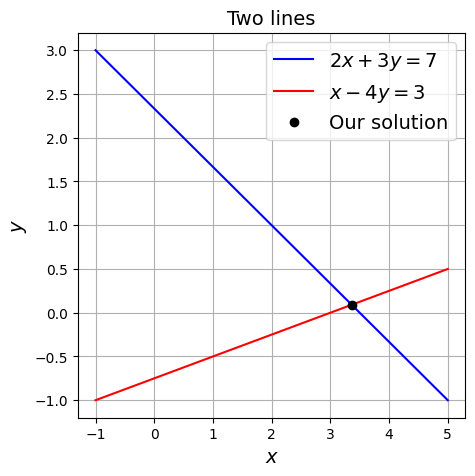

In [5]:
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (7./3.)
y2 = (1./4.)*x - (3./4.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=7$')
ax1.plot(x,y2,'r', label='$x-4y=3$')
ax1.plot(37./11,1./11, 'ko', label='Our solution')

ax1.legend(loc='best', fontsize=14);

**Note** that this is not true for problems in higher dimensions, $n>2$. As we explained above if the solution space is $n$-dimensional ($n$ columns in the matrix), then each equation adds a new constraint (as long as the equations are independent!). The space of vectors that satisfies just one equation is $n-1$ dimensional. The space that satisfies two linearly independent equations is $n-2$ dimensional, etc.

For instance, in 3D with a $3x3$ matrix system, we would get a plane of dimension $n-1=2$ for each of the three equations. In principle we could try to intersect these three planes to find the solution, but that's already a lot less practical. And so you see this method doesn't really work for $n>3$.

### Using the matrix inverse <a class="tocSkip"></a>

As we stated above, if $\mathbf{A}$ is non singular then $\underline{\mathbf{A}}$ is invertible, i.e. there exists a matrix $\underline{\mathbf{A}}^{-1}$, such that

$$\underline{\mathbf{A}}^{-1}\underline{\mathbf{A}} = \underline{\mathbf{A}} \underline{\mathbf{A}}^{-1}=\underline{\mathbf{I}}.$$

We can of course use this to solve the linear system $\underline{\mathbf{A}}\boldsymbol{x}=\boldsymbol{b}$ for arbtitrary $\boldsymbol{b}$ simply by left-multiplying the linear system by $\underline{\mathbf{A}}^{-1}$:

$$\underline{\mathbf{A}}^{-1} \underline{\mathbf{A}}\boldsymbol{x}=\underline{\mathbf{A}}^{-1}\boldsymbol{b}$$

which gives

$$\boldsymbol{x}=\underline{\mathbf{A}}^{-1}\boldsymbol{b}$$

In the example above the inverse of $\underline{\mathbf{A}}$ is given by:

$$
\underline{\mathbf{A}}^{-1} =
\begin{pmatrix} \frac{4}{11} & \frac{3}{11} \\ \frac{1}{11} & \frac{-2}{11} \end{pmatrix}
$$

which we can check with the code below:

In [6]:
# our matrix
A = np.array([[2, 3], [1, -4]])

# I claim this is the inverse to that matrix
Ainv = (1./11)*np.array([[4, 3], [1, -2]])

# let's check
print(A@Ainv)
print(Ainv@A)

[[ 1.000000e+00 -5.551115e-17]
 [ 0.000000e+00  1.000000e+00]]
[[1. 0.]
 [0. 1.]]


and thus we can find the solution $\boldsymbol{x}$ with:

In [7]:
# RHS vector
b = np.array([7,3])
print(Ainv@b)

[3.363636 0.090909]


## Gaussian elimination

### Row Operations
In our first attempt to solve

$$
\begin{aligned}
  2x + 3y &= 7 \\
   x - 4y &= 3 
\end{aligned}
   \quad \iff \quad
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 
  \end{pmatrix},
$$

we relied on the fact that $x$ could be easily isolated to $x=3+4y$, and we subsequently substituted it into the first to obtain an equation that contained $y$'s only.

We could have achieved exactly the same answer if we subtract twice the second equation from the first:

$$\begin{aligned}
2x + 3y &= 7 \\
x - 4y & = 3 & (-2\cdot) \\
\hline
(2-2)x + (3-2\cdot-4)y &= 7 - 2\cdot 3
\end{aligned}$$

which gives $11y=1$, or $y=1/11$.







We effectively performed what are called <a class="definition" href="#definitions" id="rowoperations">row operations</a> on the matrix and the RHS vector, which are defined as:


1. multiply each row by a non-zero scalar


2. add multiples of one row to another 


3. swap rows

For the example above, multiplying a row by a scalar or swapping rows would not change the two lines in the plot and so not change the solution.  Adding a multiple of one row to another and replacing one of the two rows with this updated row **will** change one of the lines, **but** the intersection point won't change - convince yourself of this with some additional plotting.

This is still true in more dimensions ($n>2$): if we take any two equations (rows) of the entire system and replace one of the two equations with a linear combination of the two, then each vector $\boldsymbol{x}$ that satisfies the original two equations, also satisfies the modified equations, and vice versa.

In other words, we can use row operations to transform the linear system into one that is completely equivalent, i.e. has the same (and no more) solutions.

### Row Operations on the Augmented System
We can perform these operations in a way that is easy to keep track of by forming an <a class="definition" href="#definitions" id="augmentedmatrix">augmented matrix</a> (we add the RHS vector as an additional column). 

The notation above the arrows should hopefully be clear, it's encoding the operations we are performing on the rows, with '(1)' and '(2)' identifying the first and second row, respectively. '$(1)\leftarrow (1)-2(2)$' means replace the first row with the first row minus twice the second row - the operation we performed above.

\begin{align*}
[A \, | \, \boldsymbol{b} ] = 
&\left[
  \begin{array}{cc|c}
    2 & 3 & 7 \\
    1 & -4 & 3
  \end{array}
\right] \\
\xrightarrow{(1)\leftarrow (1)-2(2)}
&\left[
  \begin{array}{cc|c}
    0 & 11 & 1 \\
    1 & -4 & 3
  \end{array}
\right] \\
\xrightarrow{(1)\leftarrow (1)/11}
&\left[
  \begin{array}{cc|c}
    0 & 1 & 1/11 \\
    1 & -4 & 3
  \end{array}
\right]\\
\xrightarrow{(2)\leftarrow (2)+4(1)}
&\left[
  \begin{array}{cc|c}
    0 & 1 & 1/11 \\
    1 & 0 & 3+4/11
  \end{array}
\right] \\
\xrightarrow{(1)\leftrightarrow (2)}
&\left[
  \begin{array}{cc|c}
    1 & 0 & 3+4/11 \\
    0 & 1 & 1/11
  \end{array}
\right]
\end{align*}

We indeed end up with the same answer as previously:

$$\boldsymbol{x} =
\begin{pmatrix}
3+4/11\\
1/11
\end{pmatrix}=
\begin{pmatrix}
37/11\\
1/11
\end{pmatrix}$$

### Calculating the Inverse Matrix through Row Operations
In the process above we have transformed the system
$$\begin{pmatrix}
    2 & 3 \\
    1 & -4  
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 
  \end{pmatrix}
$$
into
$$\begin{pmatrix}
    1 & 0 \\
    0 & 1  
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    37/11 \\
    1/11
  \end{pmatrix}
$$

A key requirement to obtained the correct answer is that we have to apply the same row operations on both the left-hand and the right-hand side of the equation.

Let's write our original linear system in a slightly different way:
$$\begin{pmatrix}
    2 & 3 \\
    1 & -4  
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    1 & 0 \\
    0 & 1
  \end{pmatrix}
  \begin{pmatrix}
    7 \\
    3 
  \end{pmatrix}.
$$
In other words, we have inserted the identity matrix on the right-hand side. If we now apply the same Gaussian Elimination process as before, we now have to apply the row operations on the matrix on the right-hand side (which starts as the identiy matrix) as well! Note however that in this case we no longer have to do this for the $(7, 3)$ vector - applying the row operations on the matrix on the right-hand side automatically means that the product of that changing matrix with $(7,3)$ will change as before.

If we go through the same process, which on the left-hand side step-by-step turns the original matrix into the identity matrix, then on the right-hand side we obtain a transformed matrix $\underline{\mathbf B}$

$$
\begin{pmatrix}
    1 & 0 \\
    0 & 1
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \underline{\mathbf B}
  \begin{pmatrix}
    7 \\
    3 
  \end{pmatrix}
$$

Note however that the operations we perform do not actually depend on the original right-hand side vector $(7,3)$ - which means we always end up with the same matrix $\mathbf B$, and thus this matrix which maps any right-hand side vector to the solution must in fact be the inverse matrix $\underline{\mathbf{A}}^{-1}$.

Thus we see that we can obtain the inverse of $\underline{\mathbf{A}}$ by starting with an augmented matrix in which, instead of the right-hand side vector $\boldsymbol{b}$, we insert all columns of the identity matrix, and apply the exact same operations as before:

\begin{align*}
[A \, | \, \, I] = 
&\left[
  \begin{array}{cc|cc}
    2 & 3 &  1 & 0 \\
    1 & -4 & 0 & 1  
  \end{array}
\right] \\
\xrightarrow{(1)\leftarrow (1)-2(2)}
& \left[
  \begin{array}{cc|cc}
    0 & 11 & 1 & -2 \\
    1 & -4 & 0 & 1  
  \end{array}
\right] \\
\xrightarrow{(1)\leftarrow (1)/11}
& \left[
  \begin{array}{cc|cc}
    0 & 1 & 1/11 & -2/11 \\
    1 & -4 & 0 & 1  
  \end{array}
\right]\\
\xrightarrow{(2)\leftarrow (2)+4(1)}
&\left[
  \begin{array}{cc|cc}
    0 & 1 & 1/11 & -2/11 \\
    1 & 0 & 4/11 & 1-8/11  
  \end{array}
\right] \\
\xrightarrow{(1)\leftrightarrow (2)}
&\left[
  \begin{array}{cc|cc}
    1 & 0 & 4/11 & 1-8/11  \\
    0 & 1 & 1/11 & -2/11 
  \end{array}
\right]
\end{align*}

which indeed gives the same inverse as before:

$$A^{-1} = 
\begin{pmatrix}
    4/11 & 1-8/11  \\
    1/11 & -2/11 
\end{pmatrix}= 
\begin{pmatrix}
    4/11 & 3/11  \\
    1/11 & -2/11 
\end{pmatrix}.$$

### Gaussian Elimination
Although the example above shows us how we can solve linear systems, and calculate the inverse of a matrix through row operations, we haven't really discussed how we decide which operations to perform and in which order. To obtain the solution vector on the right-hand side (or the inverse matrix), we need to end up with the identity matrix on the left. A natural, systematic way to do this is to first ensure we get zeros everywhere below the diagonal.

This can be achieved by the following process:
* Take the diagonal entry of the first row, i.e. $a_{11}$ and eliminate the entry below it, $a_{21}$ by subtracting the first row multiplied by $a_{21}/a_{11}$ from the second row:
$$
\begin{pmatrix}
  a_{11} & a_{12} & a_{13} & \dots \\
  a_{21} & a_{22} & a_{23} & \dots \\
  a_{31} & a_{32} & a_{33} & \dots \\
  \vdots & \vdots & \vdots & \ddots
  \end{pmatrix}
\rightarrow
\begin{pmatrix}
  a_{11} & a_{12} & a_{13} & \dots \\
  0 & a_{22}-\frac{a_{21}}{a_{11}}a_{12} & a_{23}-\frac{a_{21}}{a_{11}}a_{13} & \dots \\
  a_{31} & a_{32} & a_{33} & \dots \\
  \vdots & \vdots & \vdots & \ddots
  \end{pmatrix}
$$
Note that the first entry in row 2 becomes $a_{21}-\frac{a_{21}}{a_{11}}a_{11}=0$ indeed.

* This process can be repeated to eliminate the $a_{31}$ entry: we subtract the first row multiplied by $a_{31}/a_{11}$ from the third row.

* The same can be done for all entries in the first column, so that we end up with only zeros in that column below the diagonal entry $a_{11}$.

* We can now repeat the same thing for all entries *below* the $a_{22}$ diagonal entry: we subtract multiples of the second row from the rows below such that all entries in the column below $a_{22}$ become zero.

* Finally, we can repeat this process zeroing all entries below each of the subsequent diagonal entries.

This process is referred to as <a class="definition" href="#definitions" id="GaussianElimination">Gaussian Elimination</a>.

### Back Substitution
So far we have transformed the system of equations into the following form:

$$
\begin{pmatrix}
  \hat{a}_{11} & \hat{a}_{12} & \hat{a}_{13} & \dots & \hat{a}_{1,n-1} & \hat{a}_{1n} \\
  0 & \hat{a}_{22} & \hat{a}_{23} & \dots & \hat{a}_{2,n-1} & \hat{a}_{2n} \\
  0 & 0 & \hat{a}_{33} & \dots & \hat{a}_{3,n-1} &\hat{a}_{3n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots &\vdots \\
  0 & 0 & 0 & 0 & \hat{a}_{n-1,n-1} & \hat{a}_{n-1, n} \\
  0 & 0 & 0 & 0 & 0 & \hat{a}_{nn}
  \end{pmatrix}
  \begin{pmatrix}
    x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_{n-1} \\ x_n
  \end{pmatrix}
  =
  \begin{pmatrix}
    \hat{b}_1 \\ \hat{b}_2 \\ \hat{b}_3 \\ \vdots \\ \hat{b}_{n-1} \\ \hat{b}_n
  \end{pmatrix},
$$

where the $\hat{a}_{ij}$ and $\hat{b}_j$ indicate the remaining nonzero entries which have changed from the original system. A matrix that only has nonzero entries on and above the diagonal is called <a class="definition" href="#definitions" id="upperdiagonal">upper diagonal</a>.

Now you might wonder why we didn't just repeat the same process as above to also eliminate the entries *above* the diagonal. The reason is, that a linear system of equations based on an upper diagonal matrix can already be solved easily and efficiently by solving the equations one by one in reverse order:

* The last equation of an upper diagonal $n\times n$ matrix system is simply:
  $$\hat{a}_{nn} x_n = \hat{b}_n$$
  which we can immediately solve for $x_n$:
  $$x_n=\frac{\hat{b}_n}{\hat{a}_{nn}}$$
* Now if we continue with the penultimate equation:
  $$\hat{a}_{n-1,n-1} x_{n-1} + \hat{a}_{n-1,n} x_n = \hat{b}_{n-1},$$
  we already know what $x_n$ is, so that we can immediately work out what $x_{n-1}$ is as well:
  $$x_{n-1} = \frac{\hat{b}_{n-1} -\hat{a}_{n-1,n} x_n}{\hat{a}_{n-1,n-1}}$$
* Similarly for all subsequent equations above, if we go through in reverse order and arrive at row $i$ we already know all $x_j$ for $j>i$. Because of the upper diagonal form, the only entry of $x$ used in row $i$ that we don't know yet is $x_i$ associated with the diagonal,
$$\hat{a}_{i,i} x_{i} + \hat{a}_{i,i+1} x_{i+1} + \dots \hat{a}_{i,n} x_n  = \hat{b}_i,$$
so  we can directly calculate it:
  $$x_i = \frac{\hat{b}_i - \sum_{j>i}\hat{a}_{i,j} x_j}{\hat{a}_{i,i}}$$
  
This process of solving an upper-diagonal linear system is called <a class="defition" id="backsubtitution" href="#definitions">back substitution</a>.

As you can imagine if we have a matrix that is <a class="definition" href="#definitions" id="lowerdiagonal">lower diagonal</a>, i.e. all its nonzero entries are either on or *below* the diagonal, then we can solve the system easily in a similar way by now instead going *forward* through the equations: with the first equation we can solve $x_1$, in the second equation we use the value of $x_1$ to solve $x_2$, etc. This is called <a class="definition" href="#definitions" id="forwardsubstitution">forward substitution</a> and will be useful later on.

### Pivotting
You have seen that in Gaussian elimination the diagonal entries $a_{ii}$ play a central (pivotal!) role. We refer to these diagonal entries in this process as <a class="definition" href="#definitions" id="pivots">pivots</a>. We have however overlooked one important issue: what happens if some pivot is zero? The process above required us to divide by the pivot value which clearly isn't possible if the pivot is zero.

For example, say after some Gaussian elimination steps, we have managed to zero the first column below $a_{11}$ and ended up with the following augmented matrix:

$$
\begin{array}{cccc|c}
1 & 2 & 3 & 1 & 2 \\
0 & 0 & 1 & 2 & 3 \\
0 & 4 & 3 & 1 & 2 \\
0 & 1 & 2 & 3 & 1
\end{array}
$$

We can't use the pivot in the second row to eliminate the entries in the column below it. However, if we remember that one of the allowed *row operations* is the *swapping* of two rows, we can simply swap the second and third row:

$$
\begin{array}{cccc|c}
1 & 2 & 3 & 1 & 2 \\
0 & 4 & 3 & 1 & 2 \\
0 & 0 & 1 & 2 & 3 \\
0 & 1 & 2 & 3 & 1
\end{array}
$$

Now we can proceed as before. We don't need to eliminate the $a_{32}$ entry in the third row, because it is already zero, but we can eliminate the $a_{42}$ entry by subtracting the second row multiplied by $1/4$ from the last row.

Let us consider a different example:
\begin{align*}
\epsilon x_1 + x_2 = 1 \\
x_1 + x_2 = 2
\end{align*}
We can write it in augmented matrix form:
$$
\begin{array}{cc|c}
  \epsilon & 1 & 1 \\
  1 & 1 & 2
\end{array}
$$
which we can transform in upper triangular form with Gaussian Elimination in one step:
$$
\begin{array}{cc|c}
  \epsilon & 1 & 1 \\
  0 & 1-\frac{1}{\epsilon} & 2-\frac{1}{\epsilon}
\end{array}
$$
The solution then follows from back substitution:
\begin{align*}
  x_2 = \frac{2-\frac{1}{\epsilon}}{1-\frac{1}{\epsilon}} \\
  x_1 = \frac{1 - x_2}\epsilon
\end{align*}
which have implemented below:

In [8]:
eps = 1e-5
A = np.array([[eps, 1],[1,1]])
b = np.array([1,2])
x2 = (2-1/eps)/(1-1/eps)
x1 = (1-x2)/eps
x = np.array([x1,x2])
print(x)
# check that the LHS Ax is the same as the RHS b
if not np.allclose(A@x, b):
    print("Solution is incorrect!")


[1.00001 0.99999]


So far so good, but now try what happens if we change $\epsilon=1^{-20}$ (i.e. `eps=1e-20`).
It seems the for small values of $\epsilon$ the algorithm no longer produces the correct answer. The reason is numerical round off: for small $\epsilon$, $1/\epsilon$ is much larger than 1 and also much larger than 2. Therefore in the computation of $x_2$ for small enough $\epsilon$ we get
$$
x_2 = \frac{2-\frac{1}{\epsilon}}{1-\frac{1}{\epsilon}} \approx \frac{-\frac{1}{\epsilon}}{-\frac{1}{\epsilon}} = 1
$$
and therefore $x_1=(1-x_2)/\epsilon=0$.

A more careful analysis however tell us (don't worry about this derivation!):
\begin{align*}
x_2 = \frac{2-\frac{1}{\epsilon}}{1-\frac{1}{\epsilon}}
= \frac{1+(1-\frac{1}{\epsilon})}{1-\frac{1}{\epsilon}}
= \frac{1}{1-\frac{1}{\epsilon}} + 1
= 1 + \frac{\epsilon}{\epsilon-1}
= 1 - \frac{\epsilon}{1-\epsilon} \\
x_1 = \frac{1 - x_2}\epsilon 
= \frac{\epsilon}{\left(1-\epsilon\right)\epsilon}
= \frac{1}{1-\epsilon} 
= \frac{1-\epsilon+\epsilon}{1-\epsilon}
= 1 + \frac{\epsilon}{1-\epsilon} 
\end{align*}
Using $\epsilon/(1-\epsilon)\approx \epsilon$ we thus get a much more accurate approximation:
\begin{align*}
  x_2 \approx 1-\epsilon,\\
  x_1 \approx 1+\epsilon
\end{align*}

In [9]:
eps = 1e-20
A = np.array([[eps, 1],[1,1]])
b = np.array([1,2])
# exact formula from the "more careful analysis" above
x2 = 1 - eps/(1-eps)
x1 = 1 + eps/(1-eps)
x = np.array([x1,x2])
print(x)
# check that the LHS Ax is the same as the RHS b
if not np.allclose(A@x, b):
    print("Solution is incorrect!")

[1. 1.]


We see that due to numerical round off we have to be very careful about the order in which we perform operations: two algorithms that are mathematically exactly equivalent do not necessarily give the same answer when implemented numerically. Generally speaking we want to avoid adding very large numbers to small ones - which is exactly what we are doing wrong when we are using a pivot that is a small number.

We can avoid this situation in exactly the same way as we did when encountering zero pivots: we simply swap the row with the small pivot with a row below that has a larger value in that column. Note that in the example above we started off with a small value on the diagonal of the original matrix. In practice you will see that such small values can easily arise during the Gaussian elimination process, even if no small values were present in the original matrix. This means we can't solve this problem by simply filtering out small values in the original matrix and replace them by zero.

Rather than just swapping with any row that has a reasonably large value in the column below the small pivot, it is in fact better (in order to minimize the amount of round off error) to  always swap with the row that has largest absolute value in the column below. Thus we modify the Gaussian elimination procedure such that when we start eliminating column $i$ below a diagonal entry $a_{ii}$, we consider any entry in that column **on and below** the diagonal and pick the largest (in absolute value) as our pivot by swapping that row with row $i$ that holds the diagonal entry of that column. In other words, even if the $a_{ii}$ is already reasonably large, we search in the column below if we can find an even larger value to use as the pivot. This addition to Gaussian Elimination is called <a class="definition" href="#definitions" id="partialpivotting">partial pivotting</a><a href="#footnote1">\*</a>

<a id="footnote1"><font color="black" size="2">\* The reason it's called *partial* is because it is in fact also possible to introduce column swaps in the elimination process, it just requires a bit of extra administration. If we use column swaps, we can also look for larger pivot values in the row to the right of the diagonal entry, and this would be called **full pivotting**</font></a>

## LU Decomposition
In our first example we saw that we can also use row operations to calculate the entire inverse matrix, rather than just solving for a single right-hand side $\boldsymbol{b}$. We did this by inserting the identity matrix on the right-hand side

$$
\begin{pmatrix}
  a_{11} & a_{12} & a_{13} & \dots \\
  a_{21} & a_{22} & a_{23} & \dots \\
  a_{31} & a_{32} & a_{33} & \dots \\
  \vdots & \vdots & \vdots & \ddots
\end{pmatrix}
  \begin{pmatrix}
    x_1 \\ x_2 \\ x_3 \\ \vdots
  \end{pmatrix}
  =
  \begin{pmatrix}
  1 & 0 & 0 & \dots \\
  0 & 1 & 0 & \dots \\
  0 & 0 & 1 & \dots \\
  \vdots & \vdots & \vdots & \ddots
  \end{pmatrix}
  \begin{pmatrix}
    b_1 \\ b_2 \\ b_3 \\ \vdots
  \end{pmatrix},
$$

and applying the same row operations on the identity matrix instead of on $\boldsymbol{b}$. Now what happens if we follow the Gaussian Elimination procedure such that the matrix on the left turns into an upper diagonal matrix? It turns out that applying the same row operations on the matrix on the right, which starts out as the identity matrix, turns it into a <a class="definition" href="#definitions" id="lowerdiagonalmatrix">lower diagonal matrix</a>, i.e. a matrix whose only nonzero entries are on or below the diagonal

$$
\begin{pmatrix}
  U_11 & U_{12} & U_{13} & \dots \\
  0 & U_{22} & U_{23} & \dots \\
  0 & 0 & U_{33} & \dots \\
  \vdots & \vdots & \vdots & \ddots
  \end{pmatrix}
  \begin{pmatrix}
    x_1 \\ x_2 \\ x_3 \\ \vdots
  \end{pmatrix}
  =
  \begin{pmatrix}
  V_{11} & 0 & 0 & \dots \\
  V_{21} & V_{22} & 0 & \dots \\
  V_{31} & V_{32} & V_{33} & \dots \\
  \vdots & \vdots & \vdots & \ddots
  \end{pmatrix}
  \begin{pmatrix}
    b_1 \\ b_2 \\ b_3 \\ \vdots
  \end{pmatrix},
$$

The inverse of a lower diagonal matrix is also a lower diagonal matrix and is relatively easy to calculate - for the same reason that solving a system of the form $\underline{\mathbf{L}}\boldsymbol{x}=\boldsymbol{b}$ through forward subsitution is relatively easy.
The inverse of the lower diagonal matrix on the right, can in fact be derived step-by-step if instead of the row operations we apply similar column operations with the inverse of the multipliers that we use in the row operations. We won't go into details here but the end result is that we can obtain a matrix $\underline{\mathbf{L}}$ that is the inverse of the matrix $\underline{\mathbf{V}}$ on the right in the equation above. Thus we can turn this equation
$$
  \mathbf{\underline{U}}\boldsymbol{x} = \mathbf{\underline{V}}\boldsymbol{b}
$$
into
$$
  \mathbf{\underline{L}}\mathbf{\underline{U}}\boldsymbol{x} = \mathbf{\underline{L}}\mathbf{\underline{V}}\boldsymbol{b} = \boldsymbol{b}
$$

This resulting matrices $\mathbf{\underline{L}}$ and $\mathbf{\underline{U}}$ are again independent of the right-hand side $\boldsymbol{b}$. Therefore, since the system of equations is still equivalent to the original system $\underline{\mathbf{A}}\boldsymbol{x}=\boldsymbol{b}$, it has to be that in fact
$$
  \underline{\mathbf{A}} = \mathbf{\underline{L}}\mathbf{\underline{U}},
$$
in other words we have managed to decompose the matrix $\underline{\mathbf{A}}$ into a product of a lower diagonal and an upper diagonal matrix, a so called <a class="definition" href="#definitions" id="LUdecomposition">LU-decomposition</a>.

If we want to include partial pivotting then we need an additional matrix $\underline{\mathbf{P}}$, the permutation matrix that encodes the row swaps needed for the pivotting

$$
\underline{\mathbf{A}} = \underline{\mathbf{P}}\mathbf{\underline{L}}\mathbf{\underline{U}},
$$

The inverse of the of the permutation matrix is given by its transpose, and thus if we want to solve:

$$
  \underline{\mathbf A}\boldsymbol{x} = \underline{\mathbf P}\underline{\mathbf L}\underline{\mathbf U}\boldsymbol{x}=\boldsymbol{b}
$$

we get
$$
  \underline{\mathbf L}\underline{\mathbf U}\boldsymbol{x}=\underline{\mathbf P}^T\boldsymbol{b}
$$

Now if we define a vector $\boldsymbol{y}=\underline{\mathbf U}\boldsymbol{x}$, then we can first solve
$$
 \underline{\mathbf L}\boldsymbol{y} = \underline{\mathbf P}^T\boldsymbol{b}
$$
for $\boldsymbol{y}$ which is easily done by forward substitution. Then by definition
$$
\underline{\mathbf U}\boldsymbol{x} = \boldsymbol{y},
$$
which we can now solve for $\boldsymbol{x}$ through backward substitution.

Thus we see that once we have the LU decomposition of $\underline{\mathbf A}$ we can very cheaply solve $\underline{\mathbf A}\boldsymbol{x}=\boldsymbol{b}$ in a two-stage process:

1. Solve $\underline{\mathbf L}\boldsymbol{y} = \underline{\mathbf P}^T\boldsymbol{b}$ for $\boldsymbol{y}$ through forward substitution

2. Solve $\underline{\mathbf U}\boldsymbol{x} = \boldsymbol{y}$ for $\boldsymbol{x}$ through backward substitution

Computing the LU decomposition itself is the most expensive part but usually cheaper than calculating the inverse of the matrix $\underline{\mathbf A}$ explicitly. As we will see later in this module this is in particularly true for sparse matrices with a large number of nonzero entries which are very common in computational science and engineering. Once we have obtained the LU decomposition, the two-stage solution process is never much more expensive than multiplying with an explicit inverse matrix, and again much cheaper for sparse matrices. In practice, for large problems we therefore never construct the explicit inverse matrix, it's almost always preferable to follow a decomposition approach.

Methods, such as the LU decomposition approach, in which we directly manipulate the equations are referred to as <a class="defition">direct methods</a>. Another class of solution methods for linear systems are so called <a class="definition" href="#definitions" id="iterativemethods">iterative methods</a> in which an initial guess vector is iteratively improved upon to (hopefully) converge to the solution of the system. Examples, you may have seen previously - in other modules, or previouses courses - are Jacobi or Gauss-Seidel iterations or the Conjugate Gradient method. We will come back to these methods in lecture 4.

Finally, the LU decomposition can also be used as a method to **calculate the determinant**. The determinant of a product of matrices is the product of its determinants, so:

$$\det(\underline{\mathbf A}) = \det(\underline{\mathbf P}) \det(\underline{\mathbf L}) \det(\underline{\mathbf U})$$

The determinant of the permutation matrix is easy: it's either +1 or -1 depending on the number of row swaps: -1 if odd, and +1 if the number is even. The determinant of lower or upper diagonal matrices is also easy: it's simply the product of its diagonal entries.

## Singular Matrices
So far we have assumed that the matrix is non-singular, which as we know from above, means the matrix has an inverse, and there exists a unique solution for each right-hand side. To see what happens if the matrix is singular, let us look at the following example. Suppose in the Gaussian eliminations process we have already eliminated the below-diagonal entries in column one and two. We want to continue eliminating in column 3, but here both the pivot and all entries below it happen to be zero already:

$$
\begin{pmatrix}
  1 & \tfrac 12 & 0 & 3 & 5 \\
  0 & 5 & 10 & 1 & 1 \\
  0 & 0 & 0 & \bf 4 & -2 \\
  0 & 0 & 0 & 2 & 7 \\
  0 & 0 & 0 & 2 & 3 
\end{pmatrix}
$$

We can now immediately move on to the next column and use the $\bf 4$ as our next pivot, to zero the entries below it (subtracting $\tfrac 12$ times the third row from both the fourth and fifth row:

$$
\begin{pmatrix}
  1 & \tfrac 12 & 0 & 3 & 5 \\
  0 & 5 & 10 & 1 & 1 \\
  0 & 0 & 0 & 4 & -2 \\
  0 & 0 & 0 & 0 & \bf 8 \\
  0 & 0 & 0 & 0 & 4 
\end{pmatrix}
$$

Finally we arrive at the right-most column, but because we have skipped one column, we can now use the $\bf 8$ in the fourth row, to entirely zero the last row:

$$
\begin{pmatrix}
  1 & \tfrac 12 & 0 & 3 & 5 \\
  0 & 5 & 10 & 1 & 1 \\
  0 & 0 & 0 & 4 & -2 \\
  0 & 0 & 0 & 0 & 8 \\
  0 & 0 & 0 & 0 & 0
\end{pmatrix}
$$

This brings the matrix in so called <a class="definition" href="#definitions" id="rowechelonform">row echelon form</a>:
* the leading (first nonzero) coefficient (the pivot) of a nonzero row is always strictly to the right of the leading coefficient of the row above it
* zeros rows are at the bottom of the matrix

Just like previously we may decide to continue on, and also try to eliminate the entries above the leading coefficients, and finally to divide each row by its leading coefficient so that the leading coefficient becomes 1. 
This brings the matrix in <a class="definition" href="#definitions" id="reducedrowechelonform">reduced row echelon form</a> where in addition
* the leading coefficient of each nonzero row is 1
* all other entries in the _column_ of such a leading coefficient are 0

The reduced row echelon form of the example above is given by

$$
\begin{pmatrix}
  1 & 0 & -1 & 0 & 0 \\
  0 & 1 & 2 & 0 & 0 \\
  0 & 0 & 0 & 1 & 0 \\
  0 & 0 & 0 & 0 & 1 \\
  0 & 0 & 0 & 0 & 0
\end{pmatrix}
$$

Note that there is nothing further we can do with the third column in this case.

The nonzero rows in a matrix in row echelon form are linearly independent. Therefore, 
the **rank of the matrix**, which is still the same as that of the original matrix, can be immediately read off as the number of nonzero rows in the final row echelon form. If the matrix is non-singular, no rows will become completely zero, and thus as expected the rank of the matrix is the same as the number of rows of the matrix.

The row echelon form can also be used to work out what the **null space** vectors look like. Remember that in Gaussian Elimination when applying row operations to the matrix, we have to apply the same operations to the right-hand side vector. When we are trying to work out the null space however we are actually solving $\underline{\mathbf A}\boldsymbol{x}=\boldsymbol{0}$, that is, the right-hand side vector is zero and when applying row operations to that right-hand side vector it remains the same zero vector. Therefore the zero vectors of the original matrix are the same as the zero vectors of the final row echelon form. All you have to do is find a set of linearly independent vectors that satisfy the remaining nonzero row equations.

Using the exact same procedure and definitions, we can also use Gaussian Elimination to derive a **row echelon form for non-square matrices** (under- or over-determined linear systems) and use it to compute its rank or its null space. It doesn't immediately tell us how to (approximately) solve such systems though, which we'll cover in the remainder of this lecture.

# Over-Determined problems ($m\gt n$) and the Least Squares Solution

In over-determined problems, there are more independent equations than unknowns.  That is, in the system  

$$\underline{\mathbf A}\, \boldsymbol{x} = \boldsymbol{b}$$

$m \gt n$  where $\underline{\mathbf A}$ is an $m\times n$ matrix.

<img src="./latex/matrix-tall.png" width="300x" />
<br/>

The inverse of $\underline{\mathbf A}$ is not defined, and in general there is no solution $\boldsymbol{x}$ that will exactly satisfy this relation 

BUT we can find an $\boldsymbol{x}$ if the data $\boldsymbol{b}$ lies in the range of $\underline{\mathbf A}$ but this won't generally be the case. 

<br/> 

A useful solution can still be found in the general case, and we've already seen how:

Instead of solving our original problem, we instead solve the related equation

$$\underline{\mathbf A}^T \,\underline{\mathbf A}\, \boldsymbol{x} = \underline{\mathbf A}^T \,\boldsymbol{b}$$

This relation if called the <a class="definition" href="#definitions" id="normalequation">normal equation</a>.

<br/>

The $n\times n$ matrix $\underline{\mathbf A}^T \,\underline{\mathbf A}$ is now square and symmetric, and  provided that it is not singular, the solution to the normal equation will be 
 
$$\boldsymbol{x} = (\underline{\mathbf A}^T \,\underline{\mathbf A})^{-1}\underline{\mathbf A}^T \,\boldsymbol{b}$$

This approach generates the <a class="definition" href="#definitions" id="leastsquaressolution">least squares solution</a> to the problem.

We've seen examples of this already in both the linear system case as well as in terms of linear regression (fitting a polynomial to data).

We will leave the derivation of the fact that the normal equation indeed provides the least squares solution to tomorrow, where we will see how to write it as an example of broader class of quadratic optimisation problems.

## Rank of matrix products

Note that a matrix product always has a rank that is less than or equal to the smallest rank of any of the constituent  matrices.

We also know that for any $m\times n$ matrix $\underline{\mathbf A}$, the $n\times n$ matrix $\underline{\mathbf A}^T\underline{\mathbf A}$ and the $m\times m$ matrix $\underline{\mathbf A}\underline{\mathbf A}^T$ all have the same rank: 

$$
\rank(\underline{\mathbf A}) = \rank(\underline{\mathbf A}^T)
= \rank(\underline{\mathbf A}^T\underline{\mathbf A})
= \rank(\underline{\mathbf A}\underline{\mathbf A}^T).
$$

We have several important results:


- As noted before, a square $(m = n)$  matrix is full rank if and only if it is non-singular.  


- For a tall $(m > n)$ matrix $\underline{\mathbf A}$ that is full rank (i.e. the _purely over-determined case_) the matrix formed by $\underline{\mathbf A}^T\underline{\mathbf A}$ with dimension $n \times n$ will be non-singular.  


- For a fat $(m < n)$ matrix $\underline{\mathbf A}$ that is full rank (i.e. the _purely under-determined case_) the matrix formed by $\underline{\mathbf A}\underline{\mathbf A}^T$ with dimension $m \times m$ will be non-singular. 
 
 
- If $A$ is not full rank, then whatever the shape of $\underline{\mathbf A}$, both these matrices will be singular. This is the mixed-determined case

## The left inverse (or the least-squares inverse) <a class="tocSkip"></a>

Note that the expression $(\underline{\mathbf A}^T \underline{\mathbf A})^{-1} \underline{\mathbf A}^T$ has similarities to an inverse of the rectangular matrix $\underline{\mathbf A}$ since

$$\left( (\underline{\mathbf A}^T \underline{\mathbf A})^{-1} \underline{\mathbf A}^T \right)\underline{\mathbf A} = \underline{\mathbf I}$$

However it is not a true inverse since

$$\underline{\mathbf A}\left( (\underline{\mathbf A}^T \underline{\mathbf A})^{-1} \underline{\mathbf A}^T \right) \ne \underline{\mathbf I}$$

It is often called the <a class="definition" href="#definitions" id="leftinverse">left inverse</a> (or the least-squares inverse) of $\underline{\mathbf A}$.

# Under-Determined Problems ($m\lt n$) and the Minimum Norm Solution

In under-determined problems,  there are fewer  equations than unknowns, and so  $m$  is  less than $n$.  

<img src="./latex/matrix-fat.png" width="400x"/>

Now the equations do not uniquely define a solution. 

However, in this case too there is still a useful solution to be found.  

When $m\lt n$,  the  matrix  $\underline{\mathbf A}^T\underline{\mathbf A}$ will  be  singular (cf. the rank of matrix products),  so  we  cannot  proceed  as  for  the  over-determined case.  

However, the similar $m \times m$ matrix $\underline{\mathbf A}\underline{\mathbf A}^T$ will not be singular if the equations are independent and consistent - if $\underline{\mathbf A}$ is full rank.  

We can therefore construct the solution

$$\boldsymbol{x} = \underline{\mathbf A}^T(\underline{\mathbf A}\underline{\mathbf A}^T)^{-1}\boldsymbol{b}$$

where this time the matrix $\underline{\mathbf A}^T(\underline{\mathbf A}\underline{\mathbf A}^T)^{-1}$ can be regarded as a type of inverse to $\underline{\mathbf A}$ since

$$\underline{\mathbf A}\left( \underline{\mathbf A}^T (\underline{\mathbf A}\underline{\mathbf A}^T)^{-1} \right) = \underline{\mathbf I}$$

which also means that $\boldsymbol{x}$ is indeed a solution:

$$
\underline{\mathbf A}\boldsymbol{x} = \underline{\mathbf A}\left( \underline{\mathbf A}^T (\underline{\mathbf A}\underline{\mathbf A}^T)^{-1} \right)\boldsymbol{b} =
\boldsymbol{b}
$$


- This inverse is called the <a class="definition" href="#definitions" id="rightinverse">right  inverse</a> of $A$, or the ***minimum-norm  inverse***. 

- The minimum-norm inverse generates a perfect fit to the data.  

- This however is not the only exact solution.  

- This problem has a null space since we have fewer equations than unknowns, and an  infinite  number  of  solutions  will  satisfy the data equally well.    

- The  <a class="definition" href="#definitions" id="minimumnormsolution">minimum-norm solution</a> is the solution that both fits the data exactly, and having satisfied that constraint then minimises the $L^2$   norm of the model. That  is, subject  to  first  fitting the data, it then also minimises $\boldsymbol{x}^T\boldsymbol{x}$.

This is in fact our first example of a constrained optimisation problem. We define a function, in this case $f(\boldsymbol{x})=\boldsymbol{x}^T \boldsymbol{x}$, and search for the minimum of $f(\boldsymbol{x})$ with the constraint that $\boldsymbol{x}$ should satisfy the $\underline{\mathbf{A}}\boldsymbol{x}=\boldsymbol{b}$. We will come back to constrained optimisation in lecture 10, and proof that the right-inverse solution indeed minimises the L2-norm of $\boldsymbol{x}$.

The latter condition makes the model parameter vector as "short" as possible (thinking of $\boldsymbol{x}$ as a vector) given that it must also match the data.  This  is  a  minimum  model parameter vector that  has  nothing  within  it  that  can  be  left  out  without degrading the fit to the data.  However, we can choose to add to it any linear combination from the null space and it will still explain the data exactly. 

In many circumstances, it is appropriate to parametrise the model so that the parameters that we are attempting to obtain are not defined in an absolute sense, but are defined as changes to some *a priori* model $\boldsymbol{x}_0$.  

The *a priori* model is our best guess of what the answer should be in the absence of the data.  If we parametrise in this way, then a solution using the approach above will ensure that we find the model that best fits the data and that is also as close to the *a priori* model as possible.  
In this case, the problem is often set up to solve for $\delta \boldsymbol{x}:=\boldsymbol{x} - \boldsymbol{x}_0$,
and since

$$\underline{\mathbf A}\delta \boldsymbol{x} = \underline{\mathbf A}
\boldsymbol{x} - \underline{\mathbf A}\boldsymbol{x}_0
= \boldsymbol{b} - \underline{\mathbf A} \boldsymbol{x}_0,
$$

the minimum-norm solution for $\delta \boldsymbol{x}$ takes the form:

$$\boldsymbol{x} - \boldsymbol{x}_0  = \underline{\mathbf A}^T(\underline{\mathbf A}\underline{\mathbf A}^T)^{-1}(\boldsymbol{b} - \underline{\mathbf A} \boldsymbol{x}_0)$$

or

$$\delta \boldsymbol{x} = \underline{\mathbf A}^T(\underline{\mathbf A}\underline{\mathbf A}^T)^{-1}\delta \boldsymbol{b}$$

where

$$\delta \boldsymbol{b}=\boldsymbol{b} - \underline{\mathbf A} \boldsymbol{x}_0$$

is the difference between the observed data and that predicted using the starting model $\boldsymbol{x}_0$.





# Mixed-Determined Problems

Recall our simple mixed determined problem from above

$$
\begin{pmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
0 & 2 & 2 \\
0 & 3 & 3
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix}
=
\begin{pmatrix}
1\\
2\\
2\\
3
\end{pmatrix}.
$$

None of our solution methods are applicable to this case

In [10]:
# just confirm that A.T@A and A@A.T are singular 
A = np.array([
    [1,0,0],
    [1,0,0],
    [0,2,2],
    [0,3,3]])

print(sl.det(A.T@A))
print(sl.det(A@A.T))

0.0
0.0


## Possible solution methods

In  this  problem,  $\underline{\mathbf A}$  is  not  square  so  that  $\underline{\mathbf A}^{-1}$ does not exist,  and  both  $\underline{\mathbf A}^T\underline{\mathbf A}$ and $\underline{\mathbf A}\underline{\mathbf A}^T$ are singular matrices, so that none of the methods that we have used so far will work.  

So what can we do?  There are two principal options that we will discuss in tomorrow's lecture:


1. we can use the ***generalised inverse*** $A^+$, also known as the pseudo-inverse or the ***Moore-Penrose inverse***, or


2. we can use some form of ***regularisation*** to the model of which ***damped least-squares*** is the most straightforward.   


The generalised inverse is  preferable in  small problems, especially  when we would like to analyse the quality of the results carefully, while regularised least-squares and related methods are preferable for large problems when the generalised inverse is prohibitively expensive, or when linearised inversion is being used in order to solve a non-linear problem by iteration.

# List of Definitions
<a id="definitions"/>

* <a class=definition href="#forwardproblem">forward problem</a>
* <a class=definition href="#inverseproblem">inverse problem</a>
* <a class=definition href="#residualform">residual form</a>
* <a class=definition href="#rootfindingproblem">root-finding problem</a>
* <a class=definition href="#linearlydependent">linearly dependent</a>
* <a class=definition href="#linearlyindependent">linearly independent</a>
* <a class=definition href="#rankofamatrix">rank of a matrix</a>
* <a class=definition href="#fullrank">full-rank</a>
* <a class=definition href="#rankdeficient">rank-deficient</a>
* <a class=definition href="#equidetermined">equi-determined</a>
* <a class=definition href="#underdetermined">under-determined</a>
* <a class=definition href="#overdetermined">over-determined</a>
* <a class=definition href="#inverseofthematrix">inverse of the matrix</a>
* <a class=definition href="#rowoperations">row operations</a>
* <a class=definition href="#augmentedmatrix">augmented matrix</a>
* <a class=definition href="#GaussianElimination">Gaussian Elimination</a>
* <a class=definition href="#upperdiagonal">upper diagonal</a>
* <a class=definition href="#lowerdiagonal">lower diagonal</a>
* <a class=definition href="#forwardsubstitution">forward substitution</a>
* <a class=definition href="#pivots">pivots</a>
* <a class=definition href="#partialpivotting">partial pivotting</a>
* <a class=definition href="#lowerdiagonalmatrix">lower diagonal matrix</a>
* <a class=definition href="#LUdecomposition">LU-decomposition</a>
* <a class=definition href="#iterativemethods">iterative methods</a>
* <a class=definition href="#rowechelonform">row echelon form</a>
* <a class=definition href="#reducedrowechelonform">reduced row echelon form</a>
* <a class=definition href="#normalequation">normal equation</a>
* <a class=definition href="#leastsquaressolution">least squares solution</a>
* <a class=definition href="#leftinverse">left inverse</a>
* <a class=definition href="#rightinverse">right  inverse</a>
* <a class=definition href="#minimumnormsolution">minimum-norm solution</a>
